***SMART LOAN PREDICTION***

***ANALYSIS USING PANDAS***

In [ ]:
#IMPORT THE LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#IMPORT THE DATASET
df = pd.read_csv("/content/Cleaned_Bank_Client_Dataset.csv")
df

,client_id,age,gender,marital_status,education,employment_status,annual_income,loan_amount,loan_purpose,credit_score,defaulted,loan_to_income_ratio
0,b5a15a6a-a3cb-4bf2-862d-351b159c145e,56,Female,Divorced,High School,Retired,133646,9984,Education,749,0,0.074705
1,12f75404-9d2e-4f5a-9108-451918eeb57e,69,Female,Widowed,Masters,Retired,163606,24130,Car,779,0,0.147488
2,3130cb59-d796-427a-a65a-9e71349ab57a,46,Male,Single,Bachelors,Unemployed,163840,9258,Personal,756,0,0.056506
3,779fa80b-a879-452b-b326-b00455852373,32,Male,Divorced,PhD,Unemployed,42625,13502,Car,326,1,0.316762
4,83833870-8920-483a-b641-2101071bc3af,60,Male,Married,Bachelors,Student,48660,38279,Education,655,1,0.786663
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5e87ef91-3135-4ae5-b6ef-f6070f4b19d3,38,Female,Single,High School,Employed,53107,13327,Home,637,1,0.250946
9996,796012c1-ba9e-4701-9687-1ab1869d58ec,23,Male,Divorced,Masters,Unemployed,153934,48055,Home,796,0,0.312179
9997,b06f2870-d9b0-4eaa-b8a2-42a612ea2291,18,Male,Single,Bachelors,Student,102533,14221,Education,365,1,0.138697
9998,e6585b19-b26f-4f22-b100-461cf7c9261c,21,Male,Single,Bachelors,Employed,37487,17586,Education,600,1,0.469123


In [ ]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,client_id,age,gender,marital_status,education,employment_status,annual_income,loan_amount,loan_purpose,credit_score,defaulted,loan_to_income_ratio
0,b5a15a6a-a3cb-4bf2-862d-351b159c145e,56,Female,Divorced,High School,Retired,133646,9984,Education,749,0,0.074705
1,12f75404-9d2e-4f5a-9108-451918eeb57e,69,Female,Widowed,Masters,Retired,163606,24130,Car,779,0,0.147488
2,3130cb59-d796-427a-a65a-9e71349ab57a,46,Male,Single,Bachelors,Unemployed,163840,9258,Personal,756,0,0.056506
3,779fa80b-a879-452b-b326-b00455852373,32,Male,Divorced,PhD,Unemployed,42625,13502,Car,326,1,0.316762
4,83833870-8920-483a-b641-2101071bc3af,60,Male,Married,Bachelors,Student,48660,38279,Education,655,1,0.786663


In [ ]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             10000 non-null  object 
 1   age                   10000 non-null  int64  
 2   gender                10000 non-null  object 
 3   marital_status        10000 non-null  object 
 4   education             10000 non-null  object 
 5   employment_status     10000 non-null  object 
 6   annual_income         10000 non-null  int64  
 7   loan_amount           10000 non-null  int64  
 8   loan_purpose          10000 non-null  object 
 9   credit_score          10000 non-null  int64  
 10  defaulted             10000 non-null  int64  
 11  loan_to_income_ratio  10000 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 937.6+ KB


In [ ]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,age,annual_income,loan_amount,credit_score,defaulted,loan_to_income_ratio
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,48.798400,110413.138600,25399.803300,573.361100,0.506300,0.324543
std,17.903223,52080.473638,14118.749999,157.567031,0.499985,0.327909
min,18.000000,20009.000000,1000.000000,300.000000,0.000000,0.005315
25%,34.000000,65214.250000,13290.250000,439.000000,0.000000,0.119857
50%,49.000000,110479.000000,25420.500000,573.000000,1.000000,0.228643
75%,64.000000,156155.750000,37472.250000,708.000000,1.000000,0.395682
max,79.000000,199959.000000,49996.000000,849.000000,1.000000,2.476343


In [ ]:
#  Data Loading and Initial Inspection
print("=== Dataset Shape ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n=== Data Types ===")
print(df.dtypes)

print("\n=== Missing Values ===")
print(df.isnull().sum())

=== Dataset Shape ===
Rows: 10000, Columns: 12

=== Data Types ===
client_id                object
age                       int64
gender                   object
marital_status           object
education                object
employment_status        object
annual_income             int64
loan_amount               int64
loan_purpose             object
credit_score              int64
defaulted                 int64
loan_to_income_ratio    float64
dtype: object

=== Missing Values ===
client_id               0
age                     0
gender                  0
marital_status          0
education               0
employment_status       0
annual_income           0
loan_amount             0
loan_purpose            0
credit_score            0
defaulted               0
loan_to_income_ratio    0
dtype: int64


In [ ]:
# Fix typos in categorical columns
df['marital_status'] = df['marital_status'].replace({
    'Divorced': 'Divorced',
    'Married': 'Married'
})

df['employment_status'] = df['employment_status'].replace({
    'Employed': 'Employed',
    'Retired': 'Retired'
})

In [ ]:
#  Descriptive Statistics
print("\n=== Numerical Summary ===")
print(df.describe(include='number').transpose())

print("\n=== Categorical Summary ===")
print(df.describe(include='object').transpose())


=== Numerical Summary ===
                        count           mean           std           min  \
age                   10000.0      48.798400     17.903223     18.000000   
annual_income         10000.0  110413.138600  52080.473638  20009.000000   
loan_amount           10000.0   25399.803300  14118.749999   1000.000000   
credit_score          10000.0     573.361100    157.567031    300.000000   
defaulted             10000.0       0.506300      0.499985      0.000000   
loan_to_income_ratio  10000.0       0.324543      0.327909      0.005315   

                               25%            50%            75%  \
age                      34.000000      49.000000      64.000000   
annual_income         65214.250000  110479.000000  156155.750000   
loan_amount           13290.250000   25420.500000   37472.250000   
credit_score            439.000000     573.000000     708.000000   
defaulted                 0.000000       1.000000       1.000000   
loan_to_income_ratio      0.1198

In [ ]:
# Loan statistics by purpose
print("\n=== Loan Stats by Purpose ===")
loan_purpose_stats = df.groupby('loan_purpose')['loan_amount'].agg(['mean', 'median', 'count', 'sum'])
print(loan_purpose_stats)


=== Loan Stats by Purpose ===
                      mean   median  count       sum
loan_purpose                                        
Business      25269.437468  25131.0   1959  49502828
Car           25972.029904  26061.0   1973  51242815
Education     25240.944858  25614.0   2013  50810022
Home          25384.048732  25285.0   2011  51047322
Personal      25144.347358  24931.5   2044  51395046


In [ ]:
# Income by education level
print("\n=== Income by Education ===")
education_income = df.groupby('education')['annual_income'].agg(['mean', 'median', 'count'])
print(education_income.sort_values('mean', ascending=False))


=== Income by Education ===
                      mean    median  count
education                                  
Masters      112217.604688  111601.0   2517
PhD          110361.760680  110550.5   2528
High School  110161.268560  110672.0   2465
Bachelors    108890.609237  108370.5   2490


In [ ]:
# Cross-Tabulation Analysis
print("\n=== Employment Status by Education ===")
print(pd.crosstab(df['education'], df['employment_status'], margins=True))

print("\n=== Default Rate by Marital Status ===")
print(pd.crosstab(df['marital_status'], df['defaulted'], normalize='index'))


=== Employment Status by Education ===
employment_status  Employed  Retired  Student  Unemployed    All
education                                                       
Bachelors               672      609      611         598   2490
High School             630      636      605         594   2465
Masters                 655      633      619         610   2517
PhD                     641      631      644         612   2528
All                    2598     2509     2479        2414  10000

=== Default Rate by Marital Status ===
defaulted              0         1
marital_status                    
Divorced        0.491836  0.508164
Married         0.490559  0.509441
Single          0.494519  0.505481
Widowed         0.497987  0.502013


In [ ]:
# Check for duplicates
print("\n=== Duplicate Check ===")
print(f"Number of duplicates: {df.duplicated().sum()}")

# Check for consistency (e.g., retired but young age)
print("\n=== Data Consistency Check ===")
inconsistent_age = df[(df['age'] < 50) & (df['employment_status'] == 'Retired')]
print(inconsistent_age[['client_id', 'age', 'employment_status']])


=== Duplicate Check ===
Number of duplicates: 0

=== Data Consistency Check ===
                                 client_id  age employment_status
11    accb87b2-c3ea-45b7-b2aa-3244b650a2f8   40           Retired
36    888dac92-ba13-4316-9e1a-7aca74bd95f2   42           Retired
38    12285b7d-3132-468b-bf5c-a22aeca73910   44           Retired
43    4465ea56-a503-4105-b045-20cdbf5eed9c   33           Retired
65    cf999099-9e4a-4dc7-bc21-8c2724b7eda2   31           Retired
...                                    ...  ...               ...
9965  21700903-578f-407d-8a7c-2442946776c8   33           Retired
9970  b89dbf78-a6f9-48a6-8f3f-560f4c42cd08   26           Retired
9984  68fd6e86-733e-4e83-be04-69cc3a25484d   32           Retired
9990  1dbc31db-f3fe-4f57-adda-5b455b9ccd6a   49           Retired
9999  d778eb33-ff9a-4285-b6c1-a05cb48c21e4   28           Retired

[1269 rows x 3 columns]


In [ ]:
# Loan Purpose Analysis
loan_purpose_stats = df.groupby('loan_purpose')['loan_amount'].agg(['mean', 'median', 'count'])
print("\nLoan Purpose Statistics:")
print(loan_purpose_stats)


Loan Purpose Statistics:
                      mean   median  count
loan_purpose                              
Business      25269.437468  25131.0   1959
Car           25972.029904  26061.0   1973
Education     25240.944858  25614.0   2013
Home          25384.048732  25285.0   2011
Personal      25144.347358  24931.5   2044


In [ ]:
# Convert relevant columns to numpy arrays
ages = df['age'].values
incomes = df['annual_income'].values
loan_amounts = df['loan_amount'].values
credit_scores = df['credit_score'].values

In [ ]:
#  Basic Descriptive Statistics
print("=== Basic Statistics ===")
print(f"Mean age: {np.mean(ages):.1f} years")
print(f"Median income: ${np.median(incomes):,.2f}")
print(f"Loan amount standard deviation: ${np.std(loan_amounts):,.2f}")
print(f"Credit score range: {np.ptp(credit_scores)} points")
print(f"25th percentile of ages: {np.percentile(ages, 25)} years")

=== Basic Statistics ===
Mean age: 48.8 years
Median income: $110,479.00
Loan amount standard deviation: $14,118.04
Credit score range: 549 points
25th percentile of ages: 34.0 years


In [ ]:
# Loan-to-Income Ratio Analysis
loan_to_income = loan_amounts / incomes
print("\n=== Loan-to-Income Analysis ===")
print(f"Average loan-to-income ratio: {np.mean(loan_to_income):.2f}")
print(f"Max loan-to-income ratio: {np.max(loan_to_income):.2f}")
print(f"Number of clients with loan > income: {np.sum(loan_to_income > 1)}")


=== Loan-to-Income Analysis ===
Average loan-to-income ratio: 0.32
Max loan-to-income ratio: 2.48
Number of clients with loan > income: 505


In [ ]:
#  Age Group Analysis
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-39', '40-49', '50-59', '60+']
age_groups = np.digitize(ages, bins=age_bins)
unique, counts = np.unique(age_groups, return_counts=True)

print("\n=== Age Distribution ===")
for age_group, count in zip(unique, counts):
    print(f"{age_labels[age_group-1]}: {count} clients")


=== Age Distribution ===
<30: 1857 clients
30-39: 1643 clients
40-49: 1627 clients
50-59: 1581 clients
60+: 3292 clients


In [ ]:
# Create employment status mask
employed_mask = df['employment_status'].values == 'Employed'
unemployed_mask = df['employment_status'].values == 'Unemployed'
student_mask = df['employment_status'].values == 'Student'
retired_mask = df['employment_status'].values == 'Retired'

print("\n=== Income by Employment Status ===")
print(f"Employed mean income: ${np.mean(incomes[employed_mask]):,.2f}")
print(f"Unemployed mean income: ${np.mean(incomes[unemployed_mask]):,.2f}")
print(f"Student mean income: ${np.mean(incomes[student_mask]):,.2f}")
print(f"Retired mean income: ${np.mean(incomes[retired_mask]):,.2f}")


=== Income by Employment Status ===
Employed mean income: $110,098.36
Unemployed mean income: $111,088.76
Student mean income: $109,418.84
Retired mean income: $111,071.46


In [ ]:
#Loan Amount Analysis by Gender
male_mask = df['gender'].values == 'Male'
female_mask = df['gender'].values == 'Female'

print("\n=== Loan Amount by Gender ===")
print(f"Male average loan: ${np.mean(loan_amounts[male_mask]):,.2f}")
print(f"Female average loan: ${np.mean(loan_amounts[female_mask]):,.2f}")


=== Loan Amount by Gender ===
Male average loan: $25,382.86
Female average loan: $25,416.84


In [ ]:
#Advanced: Z-score Analysis for Outliers
print("\n=== Outlier Detection (Z-scores) ===")
for col, data in zip(['Age', 'Income', 'Loan Amount', 'Credit Score'],
                     [ages, incomes, loan_amounts, credit_scores]):
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = np.sum(np.abs(z_scores) > 2)
    print(f"{col} has {outliers} potential outliers (|z-score| > 2)")


=== Outlier Detection (Z-scores) ===
Age has 0 potential outliers (|z-score| > 2)
Income has 0 potential outliers (|z-score| > 2)
Loan Amount has 0 potential outliers (|z-score| > 2)
Credit Score has 0 potential outliers (|z-score| > 2)


In [ ]:
# Binning Analysis - Loan Amounts by Income Quartiles
income_quartiles = np.percentile(incomes, [25, 50, 75])
loan_by_quartile = []
for i in range(4):
    if i == 0:
        mask = incomes <= income_quartiles[0]
    elif i == 3:
        mask = incomes > income_quartiles[2]
    else:
        mask = (incomes > income_quartiles[i-1]) & (incomes <= income_quartiles[i])
    loan_by_quartile.append(np.mean(loan_amounts[mask]))

print("\n=== Average Loan Amount by Income Quartile ===")
print("Q1 (lowest income): ${:,.2f}".format(loan_by_quartile[0]))
print("Q2: ${:,.2f}".format(loan_by_quartile[1]))
print("Q3: ${:,.2f}".format(loan_by_quartile[2]))
print("Q4 (highest income): ${:,.2f}".format(loan_by_quartile[3]))


=== Average Loan Amount by Income Quartile ===
Q1 (lowest income): $25,302.00
Q2: $25,377.72
Q3: $25,506.83
Q4 (highest income): $25,412.67


***ANALYSIS USING VISUALIZATION***

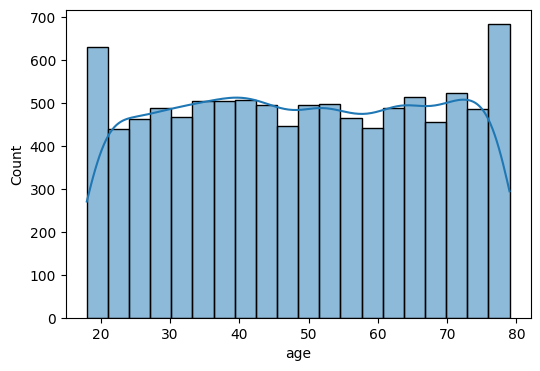

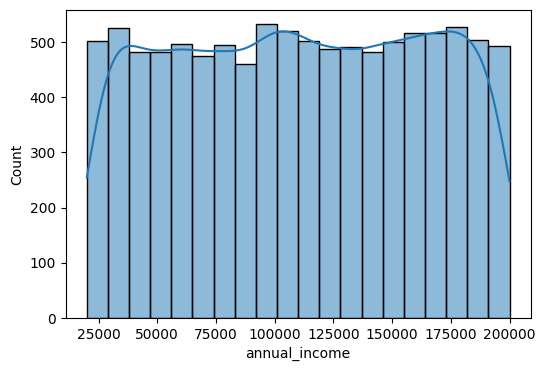

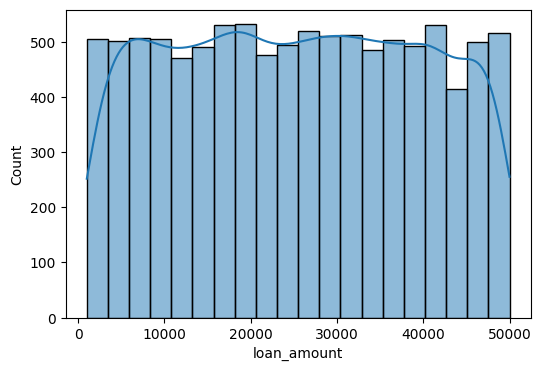

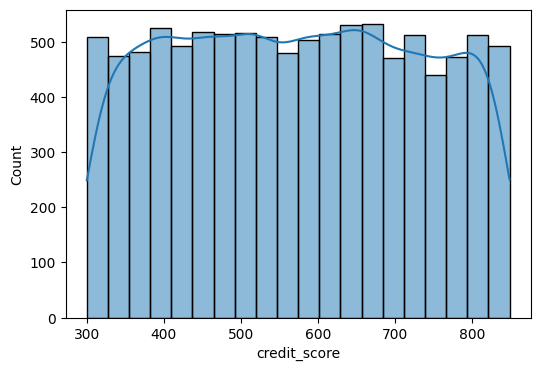

In [ ]:
#Numerical features
numeric_columns = ['age', 'annual_income', 'loan_amount', 'credit_score']
for col in numeric_columns:
    plt.figure(figsize = (6,4))
    sns.histplot(df[col],kde = True , bins = 20)

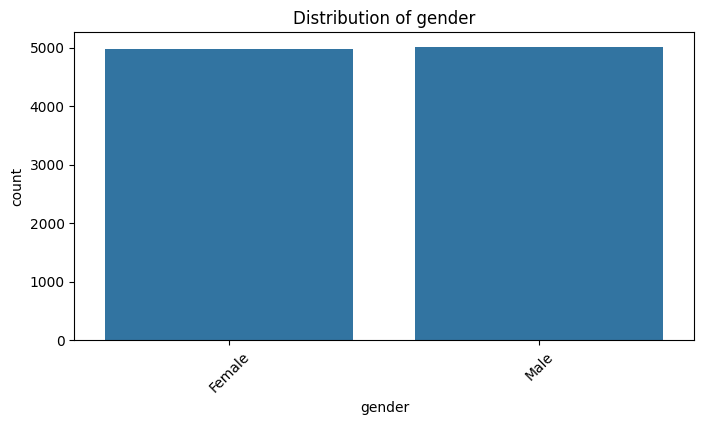

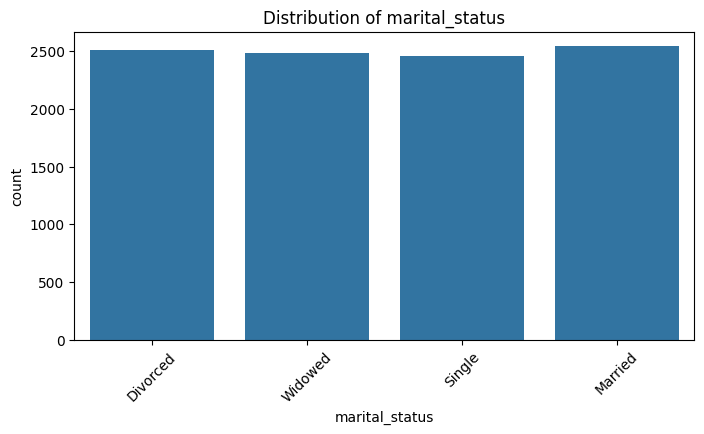

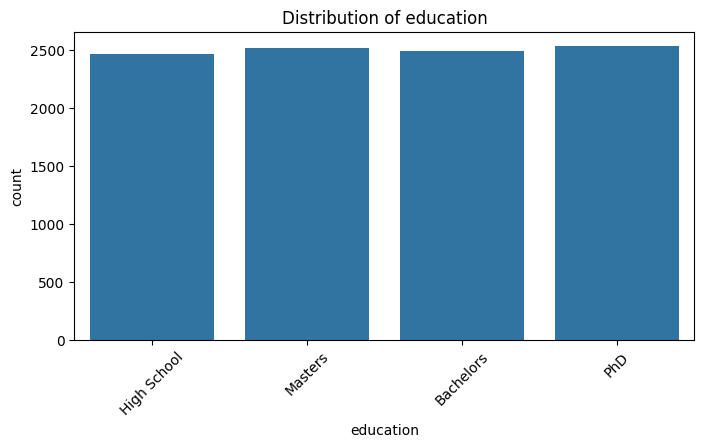

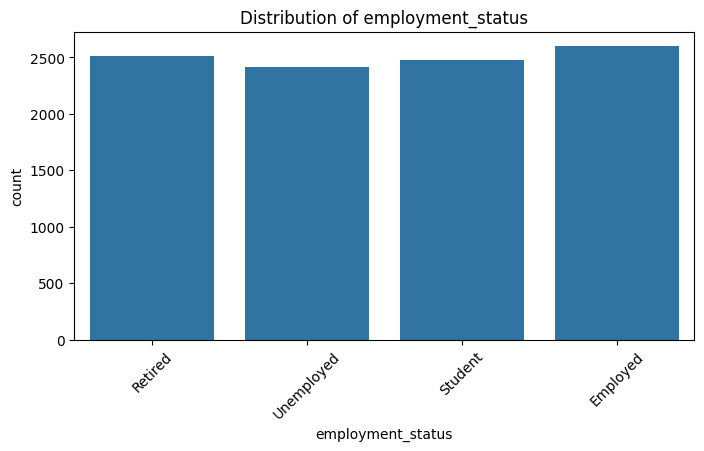

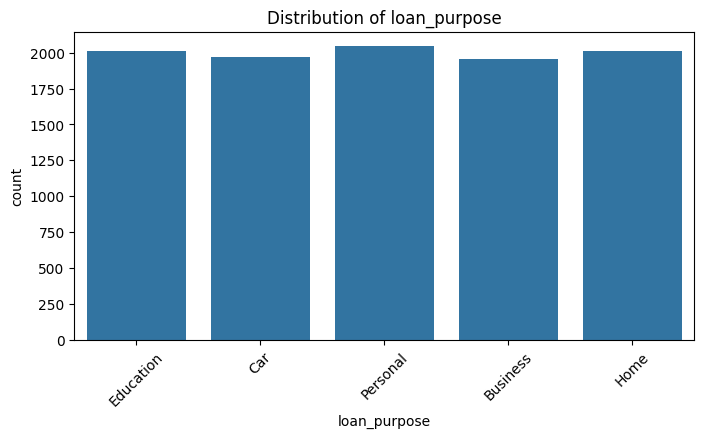

In [ ]:
# Categorical features
cat_cols = ['gender', 'marital_status', 'education', 'employment_status', 'loan_purpose']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

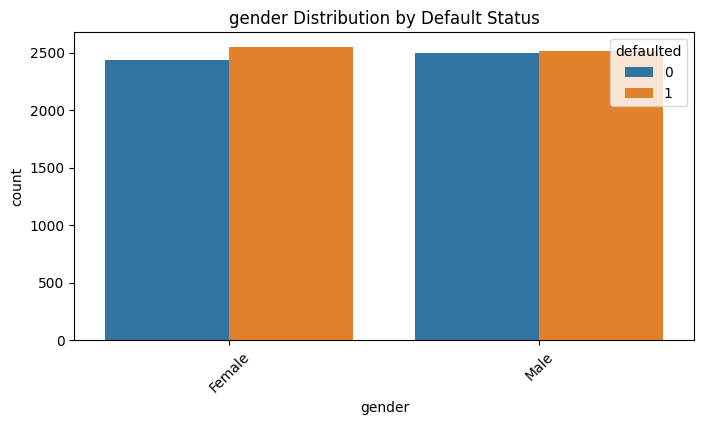

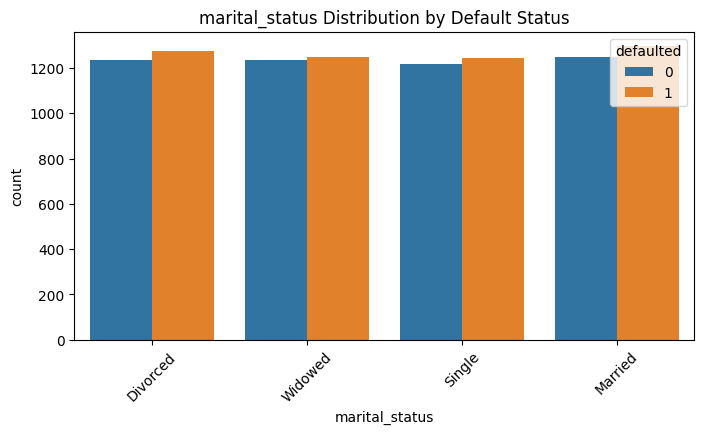

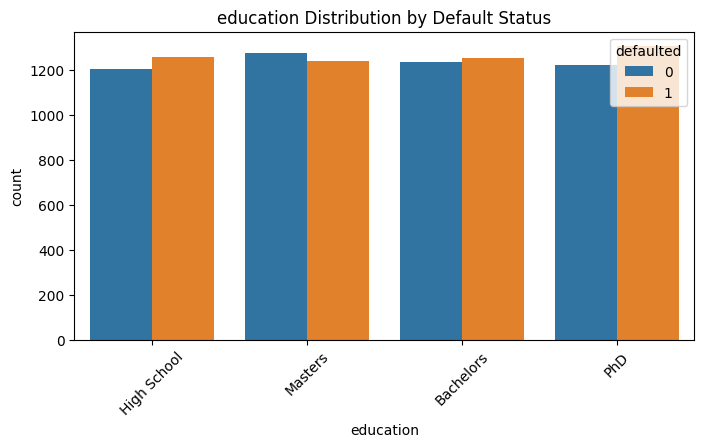

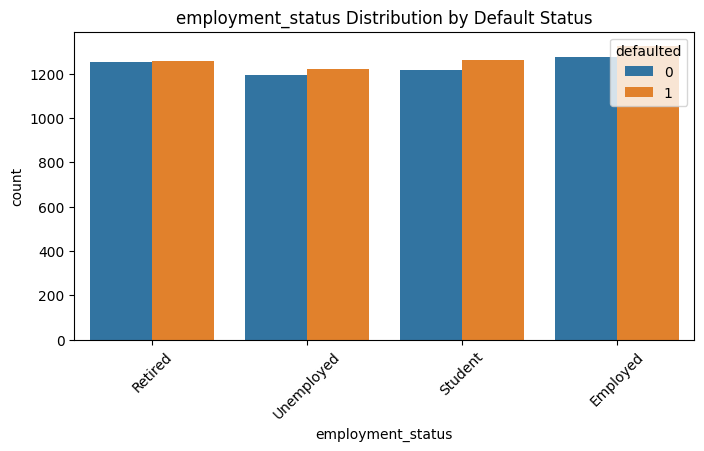

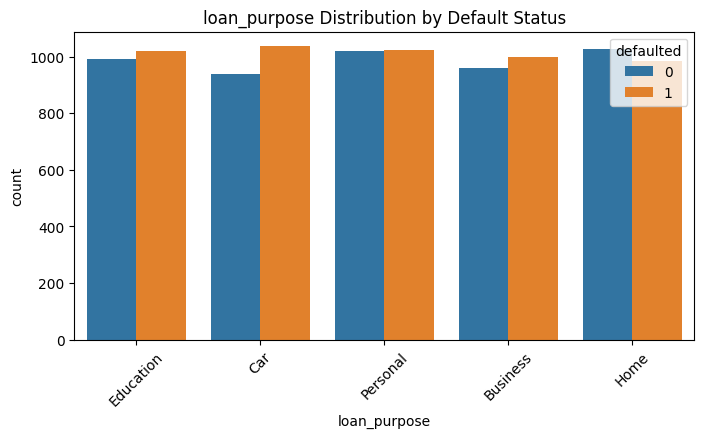

In [ ]:
# Relationship between categorical features and default
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='defaulted')
    plt.title(f'{col} Distribution by Default Status')
    plt.xticks(rotation=45)
    plt.show()

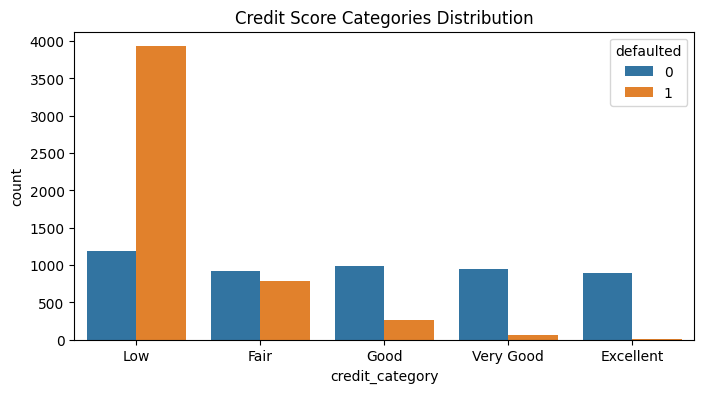

In [ ]:
#Credit Score Categories
df['credit_category'] = pd.cut(df['credit_score'],
                               bins=[0, 579, 669, 739, 799, 850],
                               labels=['Low', 'Fair', 'Good', 'Very Good', 'Excellent'])

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='credit_category', hue='defaulted')
plt.title('Credit Score Categories Distribution')
plt.show()

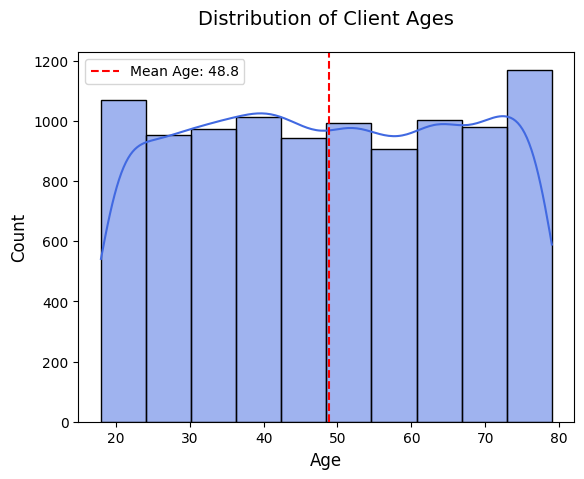

In [ ]:
sns.histplot(df['age'], bins=10, kde=True, color='royalblue')
plt.title('Distribution of Client Ages', fontsize=14, pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.axvline(df['age'].mean(), color='red', linestyle ='--', label=f'Mean Age: {df["age"].mean():.1f}')
plt.legend()
plt.show()

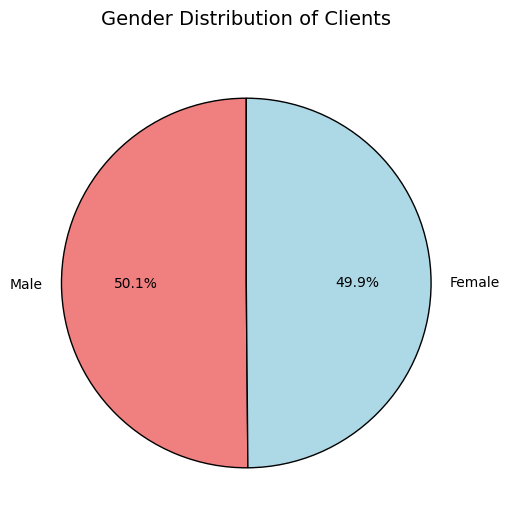

In [ ]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue'], startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Gender Distribution of Clients', fontsize=14, pad=20)
plt.show()

<Axes: >

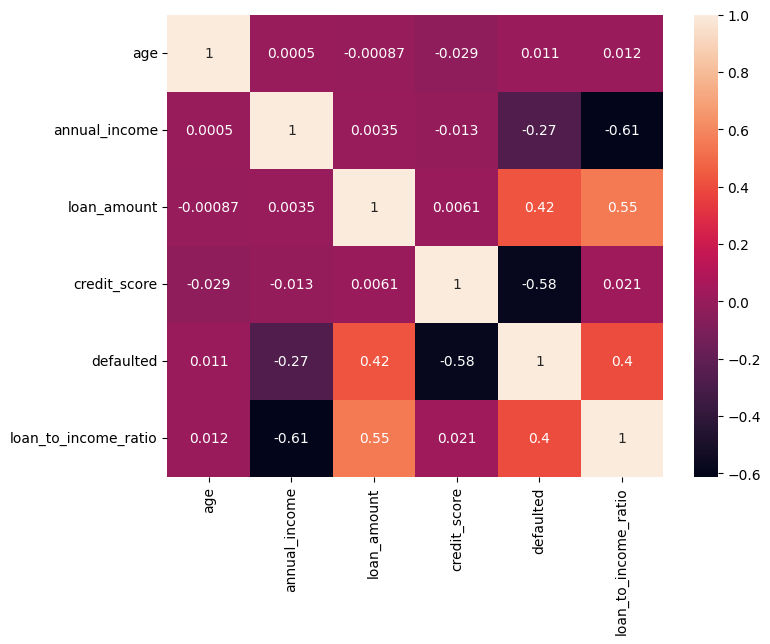

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [ ]:
df

,client_id,age,gender,marital_status,education,employment_status,annual_income,loan_amount,loan_purpose,credit_score,defaulted,loan_to_income_ratio,credit_category
0,b5a15a6a-a3cb-4bf2-862d-351b159c145e,56,Female,Divorced,High School,Retired,133646,9984,Education,749,0,0.074705,Very Good
1,12f75404-9d2e-4f5a-9108-451918eeb57e,69,Female,Widowed,Masters,Retired,163606,24130,Car,779,0,0.147488,Very Good
2,3130cb59-d796-427a-a65a-9e71349ab57a,46,Male,Single,Bachelors,Unemployed,163840,9258,Personal,756,0,0.056506,Very Good
3,779fa80b-a879-452b-b326-b00455852373,32,Male,Divorced,PhD,Unemployed,42625,13502,Car,326,1,0.316762,Low
4,83833870-8920-483a-b641-2101071bc3af,60,Male,Married,Bachelors,Student,48660,38279,Education,655,1,0.786663,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5e87ef91-3135-4ae5-b6ef-f6070f4b19d3,38,Female,Single,High School,Employed,53107,13327,Home,637,1,0.250946,Fair
9996,796012c1-ba9e-4701-9687-1ab1869d58ec,23,Male,Divorced,Masters,Unemployed,153934,48055,Home,796,0,0.312179,Very Good
9997,b06f2870-d9b0-4eaa-b8a2-42a612ea2291,18,Male,Single,Bachelors,Student,102533,14221,Education,365,1,0.138697,Low
9998,e6585b19-b26f-4f22-b100-461cf7c9261c,21,Male,Single,Bachelors,Employed,37487,17586,Education,600,1,0.469123,Fair


In [ ]:
# Drop client_id
df.drop(columns=["client_id"], inplace=True)

In [ ]:
# Drop credit_category
df.drop(columns=["credit_category"], inplace=True)

In [ ]:
df = pd.get_dummies(df,drop_first=True)
df

,age,annual_income,loan_amount,credit_score,defaulted,loan_to_income_ratio,gender_Male,marital_status_Married,marital_status_Single,marital_status_Widowed,education_High School,education_Masters,education_PhD,employment_status_Retired,employment_status_Student,employment_status_Unemployed,loan_purpose_Car,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal
0,56,133646,9984,749,0,0.074705,False,False,False,False,True,False,False,True,False,False,False,True,False,False
1,69,163606,24130,779,0,0.147488,False,False,False,True,False,True,False,True,False,False,True,False,False,False
2,46,163840,9258,756,0,0.056506,True,False,True,False,False,False,False,False,False,True,False,False,False,True
3,32,42625,13502,326,1,0.316762,True,False,False,False,False,False,True,False,False,True,True,False,False,False
4,60,48660,38279,655,1,0.786663,True,True,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38,53107,13327,637,1,0.250946,False,False,True,False,True,False,False,False,False,False,False,False,True,False
9996,23,153934,48055,796,0,0.312179,True,False,False,False,False,True,False,False,False,True,False,False,True,False
9997,18,102533,14221,365,1,0.138697,True,False,True,False,False,False,False,False,True,False,False,True,False,False
9998,21,37487,17586,600,1,0.469123,True,False,True,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
df = df.astype(int)

In [ ]:
df.columns

Index(['age', 'annual_income', 'loan_amount', 'credit_score', 'defaulted',
       'loan_to_income_ratio', 'gender_Male', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Widowed',
       'education_High School', 'education_Masters', 'education_PhD',
       'employment_status_Retired', 'employment_status_Student',
       'employment_status_Unemployed', 'loan_purpose_Car',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal'],
      dtype='object')

In [ ]:
X = df.drop("defaulted", axis = 1)
y = df["defaulted"]

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, kernel='rbf', random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
]

In [ ]:
meta_learner = LogisticRegression(max_iter = 1000)

In [ ]:
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

In [ ]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [ ]:
y_pred = stacking_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9455

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=None,       # let trees grow fully
    random_state=42,
)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:\n")
print(accuracy)

Accuracy:

0.939


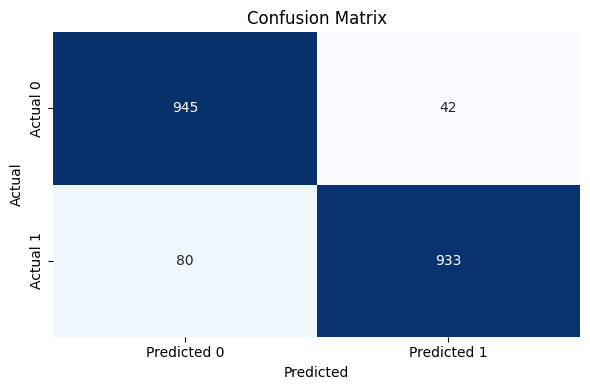

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       987
           1       0.96      0.92      0.94      1013

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [ ]:
dt_model = RandomForestClassifier(random_state=42)

In [ ]:
bagging_clf = BaggingClassifier(
    estimator=dt_model,        # Use estimator=... instead of base_estimator (newer versions of sklearn)
    n_estimators=100,          # Number of trees
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)

In [ ]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [ ]:
y_pred = bagging_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.9395


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       987
           1       0.96      0.92      0.94      1013

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Get all training feature columns from your original training data (X)
# This is important to align one-hot encoded columns properly
expected_columns = X.columns

# --- Widgets ---
gender = widgets.Dropdown(options=['male', 'female'], description='Gender:')
marital = widgets.Dropdown(options=['single', 'married'], description='Marital:')
education = widgets.Dropdown(options=['High School', 'Bachelors', 'Masters', 'PhD'], description='Education:')
employment = widgets.Dropdown(options=['Unemployed', 'Employed', 'Retired', 'Student'], description='Employment:')
purpose = widgets.Dropdown(options=['Home', 'Car', 'Education', 'Business', 'Personal'], description='Purpose:')

age = widgets.BoundedIntText(value=30, min=18, max=100, step=1, description='Age:')
income = widgets.BoundedFloatText(value=50000, min=0, max=1e7, step=1000, description='Income:')
loan = widgets.BoundedFloatText(value=10000, min=0, max=1e7, step=1000, description='Loan Amt:')
credit_score = widgets.BoundedIntText(value=700, min=300, max=900, step=1, description='Credit Score:')

display(age, gender, marital, education, employment, income, loan, purpose, credit_score)

button = widgets.Button(description="Predict Loan Outcome")

def on_click(b):
    # Construct input dictionary
    input_dict = {
        'age': age.value,
        'annual_income': income.value,
        'loan_amount': loan.value,
        'credit_score': credit_score.value,
        'gender': gender.value,
        'marital_status': marital.value,
        'education': education.value,
        'employment_status': employment.value,
        'loan_purpose': purpose.value,
        'loan_to_income_ratio': loan.value/income.value
    }

    # Convert to DataFrame
    df = pd.DataFrame([input_dict])

    # One-hot encode with same columns as training
    df_encoded = pd.get_dummies(df)
    df_encoded = df_encoded.reindex(columns=expected_columns, fill_value=0)

    # Predict
    prediction = bagging_clf.predict(df_encoded)[0]
    result = "✅ Loan Approved" if prediction == 0 else "❌ Loan Rejected (Risk of Default)"
    print("\nPrediction Result:", result)

button.on_click(on_click)
display(button)

BoundedIntText(value=30, description='Age:', min=18)

Dropdown(description='Gender:', options=('male', 'female'), value='male')

Dropdown(description='Marital:', options=('single', 'married'), value='single')

Dropdown(description='Education:', options=('High School', 'Bachelors', 'Masters', 'PhD'), value='High School'…

Dropdown(description='Employment:', options=('Unemployed', 'Employed', 'Retired', 'Student'), value='Unemploye…

BoundedFloatText(value=50000.0, description='Income:', max=10000000.0, step=1000.0)

BoundedFloatText(value=10000.0, description='Loan Amt:', max=10000000.0, step=1000.0)

Dropdown(description='Purpose:', options=('Home', 'Car', 'Education', 'Business', 'Personal'), value='Home')

BoundedIntText(value=700, description='Credit Score:', max=900, min=300)

Button(description='Predict Loan Outcome', style=ButtonStyle())


Prediction Result: ✅ Loan Approved
